# Preprocessing

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

def preprocessing_data_penerbangan():
    """
    Fungsi untuk melakukan preprocessing pada dataset penerbangan
    """
    # Membaca dataset
    print("Membaca dataset...")
    try:
        df = pd.read_csv('flight.csv')
    except FileNotFoundError:
        print("Error: File flight.csv tidak ditemukan!")
        return None
    
    # 1. Menangani missing values
    print("Menangani missing values...")
    # Menggunakan SimpleImputer untuk mengisi nilai numerik yang hilang dengan median
    numeric_imputer = SimpleImputer(strategy='median')
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])
    
    # Mengisi missing values pada kolom kategorikal dengan modus
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    categorical_columns = df.select_dtypes(include=['object']).columns
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])
    
    # 2. Encoding variabel kategorikal
    print("Melakukan encoding pada variabel kategorikal...")
    label_encoders = {}
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
    
    # 3. Menghapus outlier menggunakan IQR method
    print("Menghapus outlier...")
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # 4. Normalisasi fitur numerik
    print("Melakukan normalisasi data...")
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    # 5. Menghapus kolom yang tidak diperlukan (jika ada)
    # Misalnya, jika ada kolom ID yang tidak diperlukan
    # df = df.drop(['ID'], axis=1)
    
    # 6. Menyimpan hasil preprocessing
    print("Menyimpan hasil preprocessing...")
    df.to_csv('flight_preprocessed.csv', index=False)
    
    print("Preprocessing selesai!")
    return df

# Menjalankan preprocessing
if __name__ == "__main__":
    hasil_preprocessing = preprocessing_data_penerbangan()
    
    if hasil_preprocessing is not None:
        print("\nInformasi dataset setelah preprocessing:")
        print(f"Jumlah baris: {len(hasil_preprocessing)}")
        print(f"Jumlah kolom: {len(hasil_preprocessing.columns)}")
        print("\nSampel data:")
        print(hasil_preprocessing.head())

Membaca dataset...
Menangani missing values...
Melakukan encoding pada variabel kategorikal...
Menghapus outlier...
Melakukan normalisasi data...
Menyimpan hasil preprocessing...
Preprocessing selesai!

Informasi dataset setelah preprocessing:
Jumlah baris: 31033
Jumlah kolom: 23

Sampel data:
       MEMBER_NO  FFP_DATE  FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
11738   0.830567       713                 35       1       0.0       2112   
11817  -1.150564       894               1428       1       0.0       1804   
11886  -1.150839       732               1046       1       0.0       2198   
12003   0.192984      2690               2980       1       0.0       2717   
12074   1.153794      1403               1553       0       0.0       1813   

       WORK_PROVINCE  WORK_COUNTRY       AGE  LOAD_TIME  ...  SUM_YR_2  \
11738            942            24 -0.401826          0  ...  2.594865   
11817            907            24  1.749896          0  ... -0.984957   
11886         

# EDA

Membaca dataset preprocessed...

=== INFORMASI DASAR DATASET ===

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31033 entries, 0 to 31032
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          31033 non-null  float64
 1   FFP_DATE           31033 non-null  int64  
 2   FIRST_FLIGHT_DATE  31033 non-null  int64  
 3   GENDER             31033 non-null  int64  
 4   FFP_TIER           31033 non-null  float64
 5   WORK_CITY          31033 non-null  int64  
 6   WORK_PROVINCE      31033 non-null  int64  
 7   WORK_COUNTRY       31033 non-null  int64  
 8   AGE                31033 non-null  float64
 9   LOAD_TIME          31033 non-null  int64  
 10  FLIGHT_COUNT       31033 non-null  float64
 11  BP_SUM             31033 non-null  float64
 12  SUM_YR_1           31033 non-null  float64
 13  SUM_YR_2           31033 non-null  float64
 14  SEG_KM_SUM         31033 non-null  flo

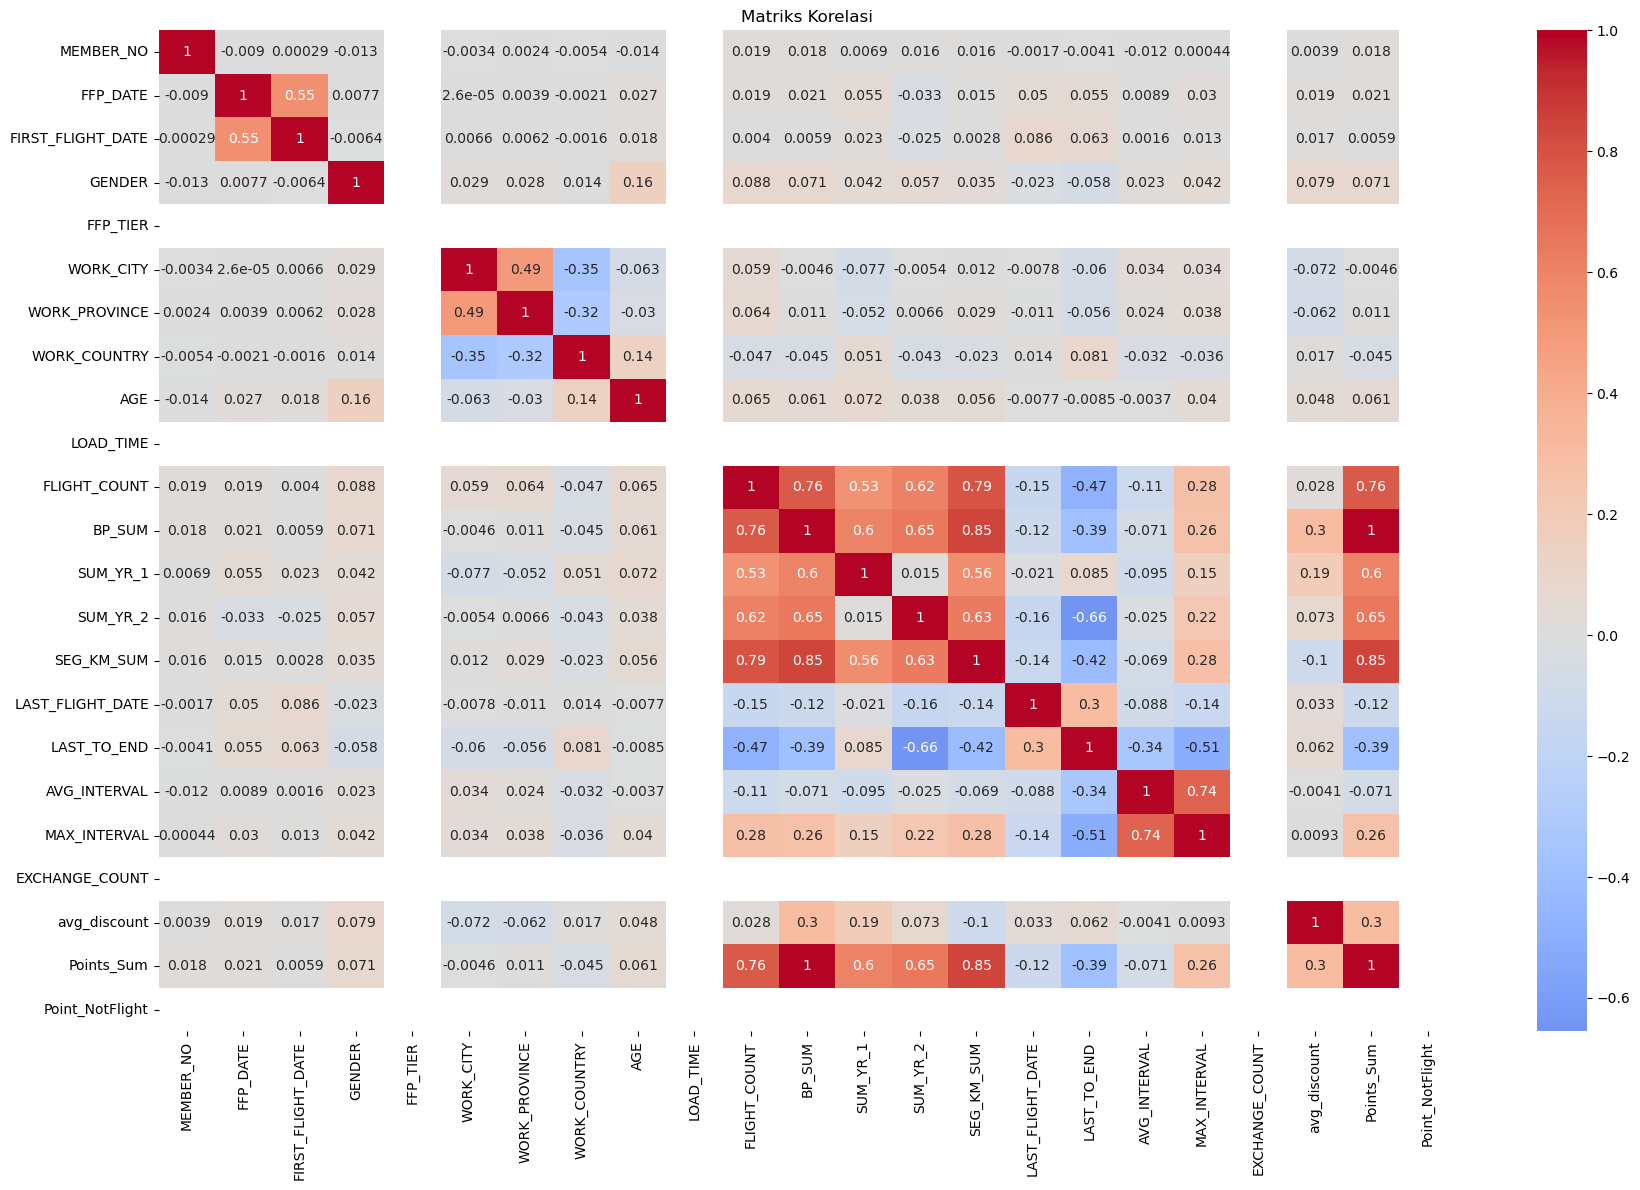

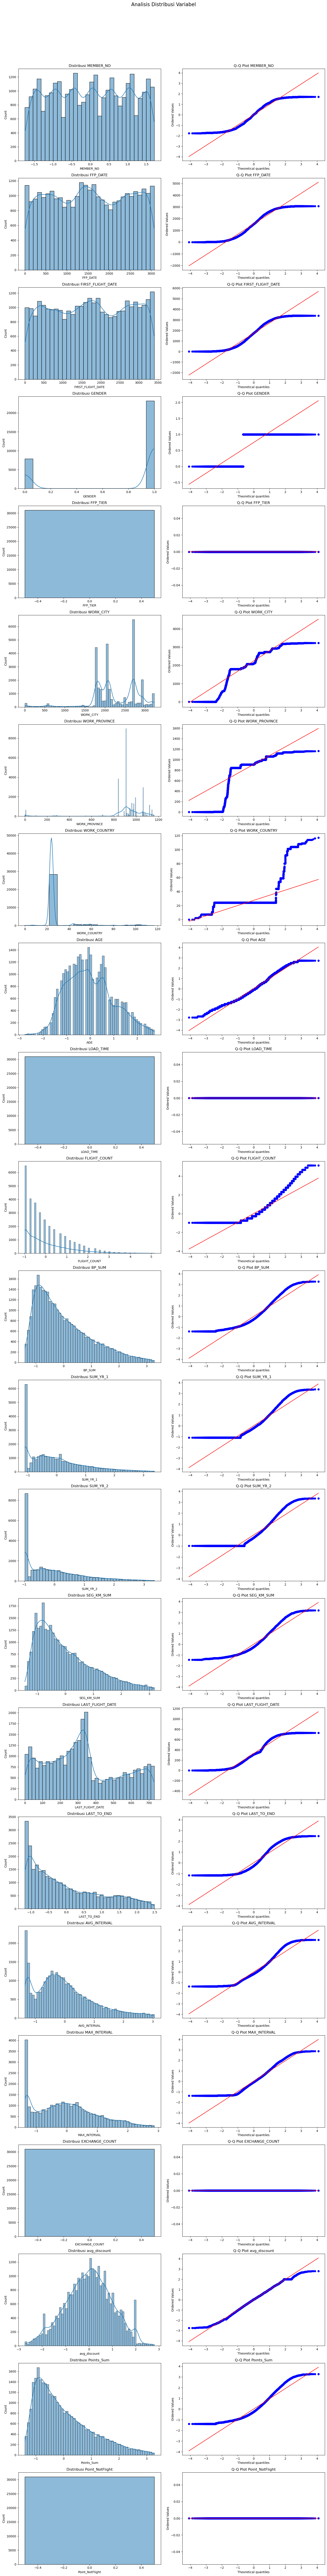

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def lakukan_eda():
    # Membaca dataset
    print("Membaca dataset preprocessed...")
    df = pd.read_csv('flight_preprocessed.csv')
    
    # 1. Informasi Dasar Dataset
    print("\n=== INFORMASI DASAR DATASET ===")
    print("\nInfo Dataset:")
    print(df.info())
    print("\nStatistik Deskriptif:")
    print(df.describe())
    
    # 2. Analisis Korelasi
    plt.figure(figsize=(18, 12))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Matriks Korelasi')
    plt.tight_layout()
    plt.show()
    
    # 3. Distribusi Variabel
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    n_cols = len(numeric_cols)
    
    # Plotting distribusi dan QQ-plots
    fig, axes = plt.subplots(n_cols, 2, figsize=(15, 5*n_cols))
    fig.suptitle('Analisis Distribusi Variabel', y=1.02, size=16)
    
    for idx, col in enumerate(numeric_cols):
        # Histogram dengan KDE
        sns.histplot(data=df, x=col, kde=True, ax=axes[idx, 0])
        axes[idx, 0].set_title(f'Distribusi {col}')
        
        # QQ-Plot
        stats.probplot(df[col], dist="norm", plot=axes[idx, 1])
        axes[idx, 1].set_title(f'Q-Q Plot {col}')
    
    plt.tight_layout()
    plt.show()
    
    
    return df

if __name__ == "__main__":
    df = lakukan_eda()

# K-Means clustering

In [18]:
!pip install kneed

Mencoba dengan 2 cluster...
Mencoba dengan 3 cluster...
Mencoba dengan 4 cluster...
Mencoba dengan 5 cluster...
Mencoba dengan 6 cluster...
Mencoba dengan 7 cluster...
Mencoba dengan 8 cluster...
Mencoba dengan 9 cluster...
Mencoba dengan 10 cluster...


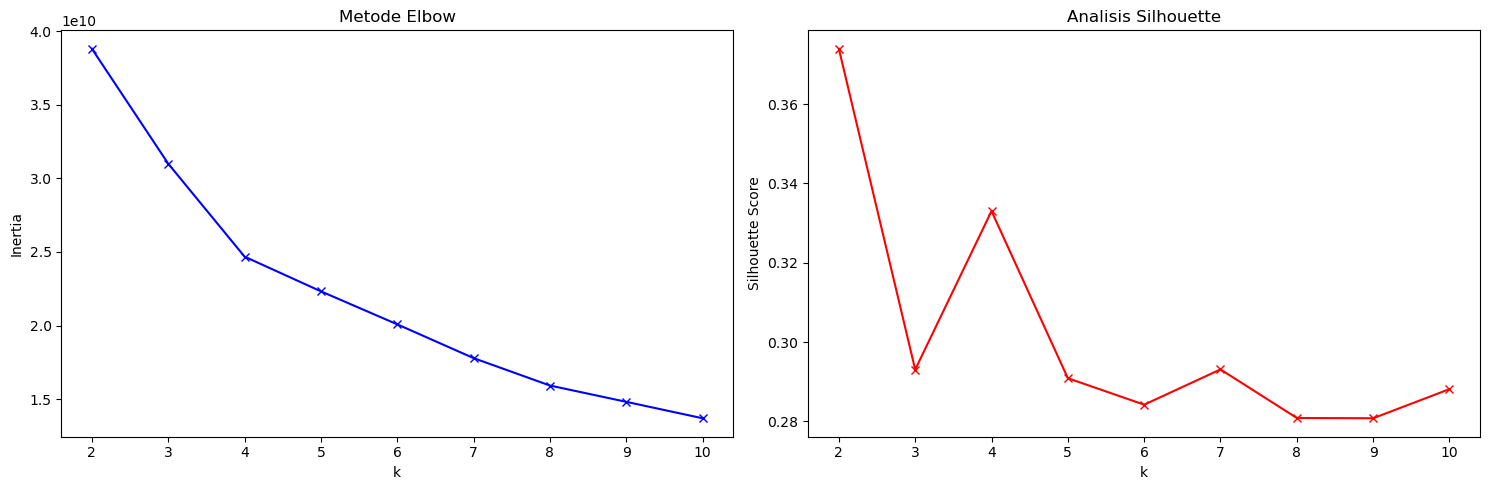


Jumlah cluster optimal: 4


In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import matplotlib.pyplot as plt

def terapkan_kmeans(df):
    # 1. Menentukan jumlah cluster optimal
    inertias = []
    silhouette_scores = []
    K = range(2, 11)
    
    for k in K:
        print(f"Mencoba dengan {k} cluster...")
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(df, kmeans.labels_))
    
    # Visualisasi elbow method dan silhouette scores
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Elbow plot
    ax1.plot(K, inertias, 'bx-')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Metode Elbow')
    
    # Silhouette plot
    ax2.plot(K, silhouette_scores, 'rx-')
    ax2.set_xlabel('k')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Analisis Silhouette')
    
    plt.tight_layout()
    plt.show()
    
    # Menentukan titik siku secara otomatis
    kl = KneeLocator(K, inertias, curve='convex', direction='decreasing')
    optimal_k = kl.elbow
    
    print(f"\nJumlah cluster optimal: {optimal_k}")
    
    # 2. Menerapkan K-Means dengan jumlah cluster optimal
    final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    df['Cluster'] = final_kmeans.fit_predict(df)
    
    cluster_centers = pd.DataFrame(
        final_kmeans.cluster_centers_, 
        columns=df.columns[:-1]
    )
    
    return df, cluster_centers, optimal_k

if __name__ == "__main__":
    df = pd.read_csv('flight_preprocessed.csv')
    df_clustered, centers, optimal_k = terapkan_kmeans(df)



    # Menyimpan hasil clustering
    df.to_csv('clustered_data.csv', index=False)
    

# Visualisasi Clustering

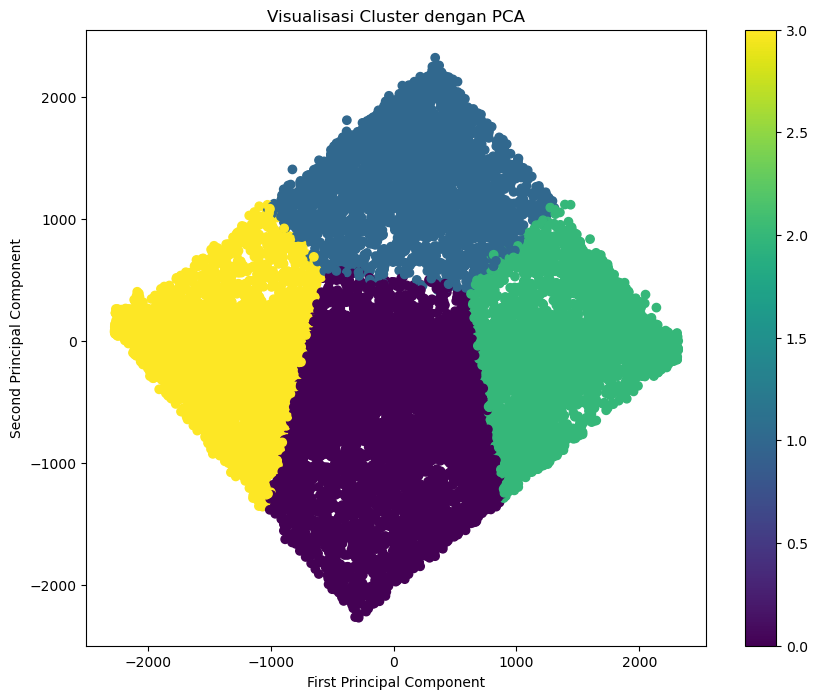

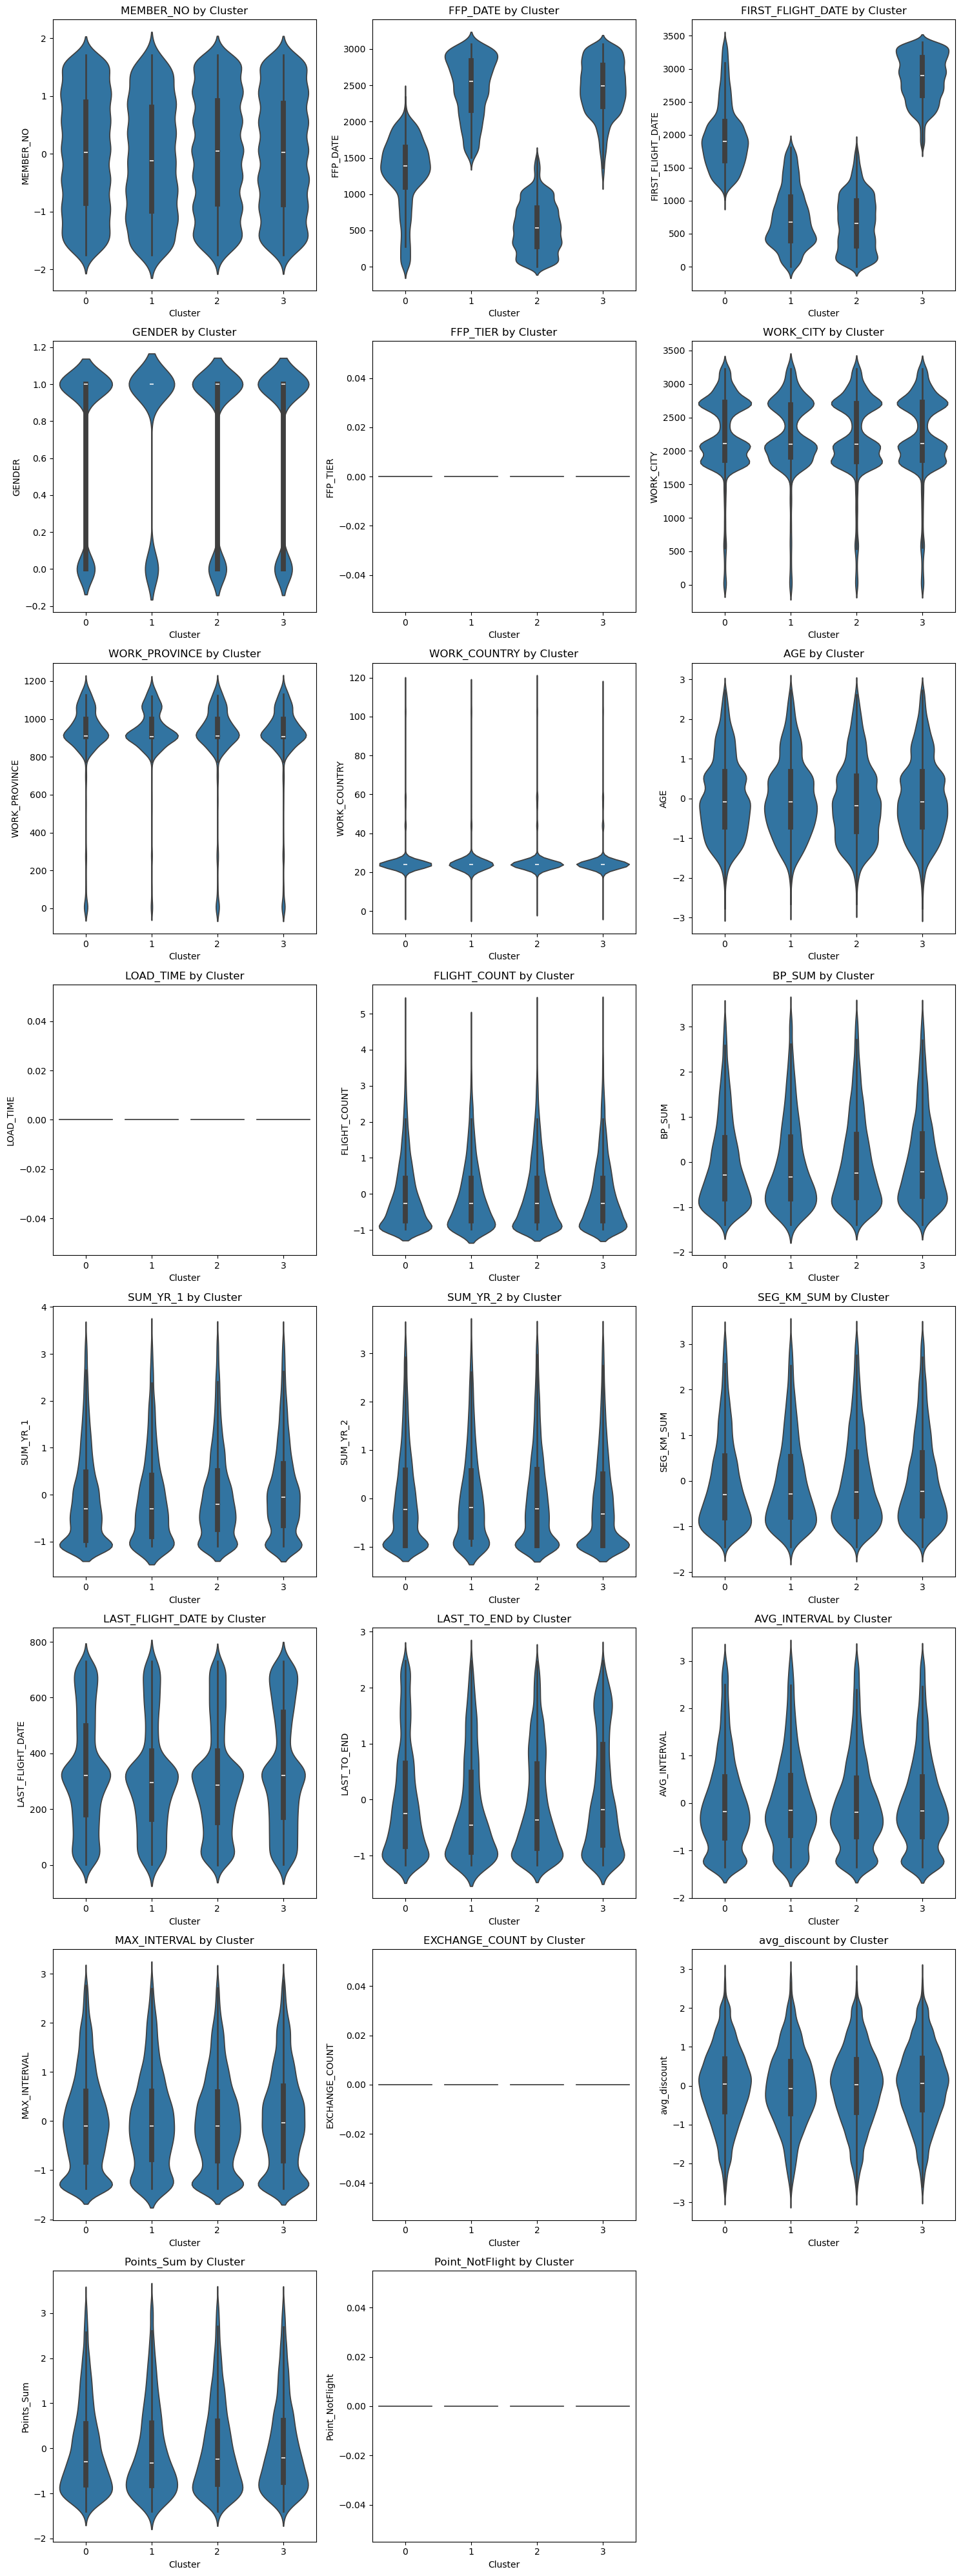

C:\Users\augustio\AppData\Local\Temp\ipykernel_20524\893706486.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=plt.cm.get_cmap("viridis")


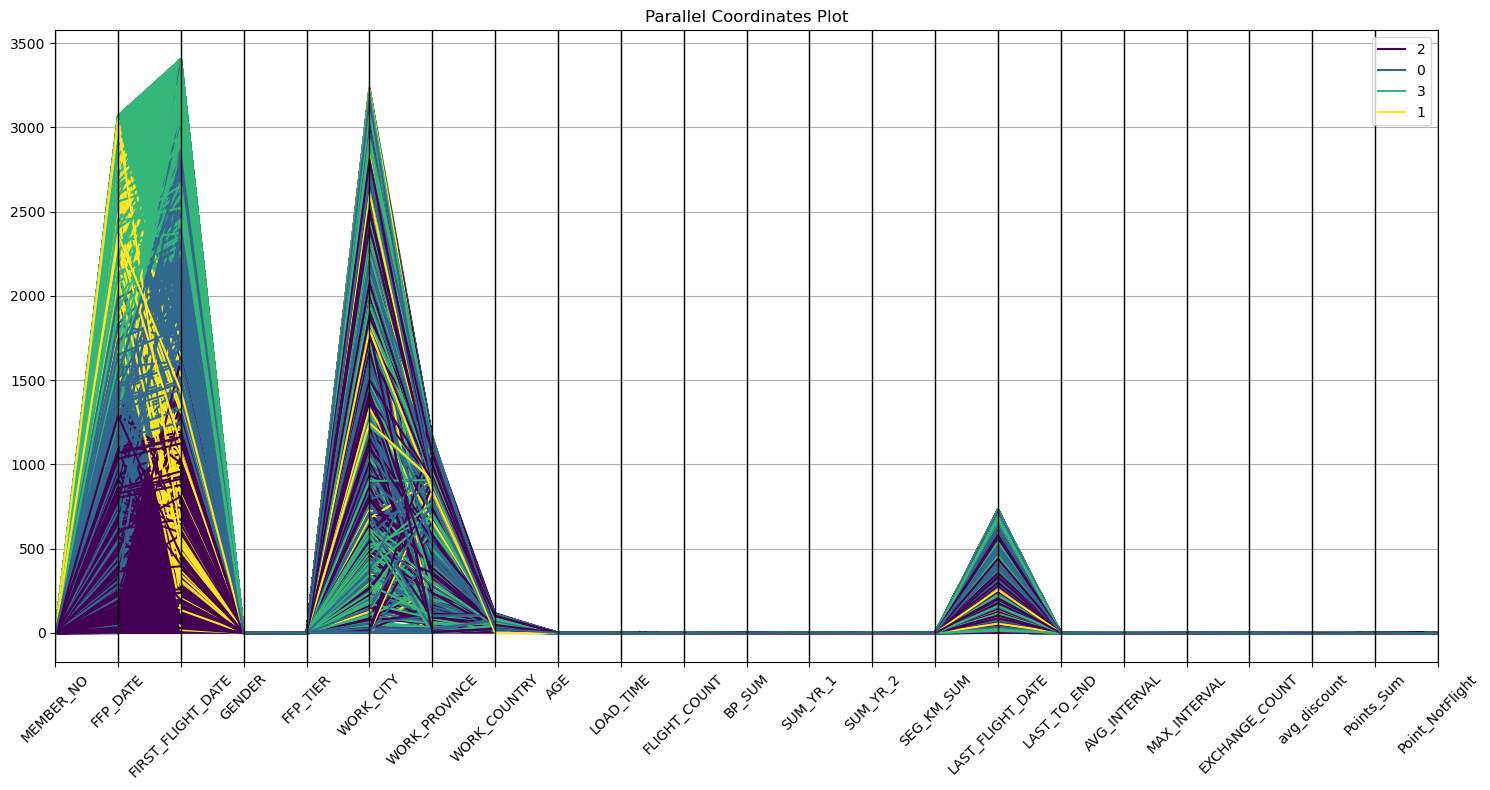

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def visualisasi_cluster(df_clustered):
    # 1. PCA untuk visualisasi 2D
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_clustered.drop('Cluster', axis=1))
    
    # Plot PCA
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                         c=df_clustered['Cluster'], cmap='viridis')
    plt.title('Visualisasi Cluster dengan PCA')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)
    plt.show()
    
    # 2. Karakteristik cluster dengan violin plots
    features = df_clustered.drop('Cluster', axis=1).columns
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, 5*n_rows))
    for i, feature in enumerate(features, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.violinplot(data=df_clustered, x='Cluster', y=feature)
        plt.title(f'{feature} by Cluster')
    plt.tight_layout()
    plt.show()
    
    # 3. Parallel Coordinates Plot
    plt.figure(figsize=(15, 8))
    pd.plotting.parallel_coordinates(
        df_clustered, 
        'Cluster',
        colormap=plt.cm.get_cmap("viridis")
    )
    plt.title('Parallel Coordinates Plot')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return pca_result

if __name__ == "__main__":
    df_clustered = pd.read_csv('clustered_data.csv')
    pca_result = visualisasi_cluster(df_clustered)


# Interpretasi dan Evaluasi Model


=== EVALUASI MODEL ===
Silhouette Score: 0.333

=== KARAKTERISTIK CLUSTER ===

Statistik per cluster:
        MEMBER_NO                      FFP_DATE                     \
             mean       std  count         mean         std  count   
Cluster                                                              
0        0.007666  1.000427  10119  1296.478802  493.157174  10119   
1       -0.089452  0.992225   3187  2471.995293  420.967370   3187   
2        0.018020  1.002925   8860   558.313657  343.779210   8860   
3        0.005396  0.997944   8867  2465.079283  380.542193   8867   

        FIRST_FLIGHT_DATE                       GENDER  ... EXCHANGE_COUNT  \
                     mean         std  count      mean  ...          count   
Cluster                                                 ...                  
0             1968.620318  488.871129  10119  0.746813  ...          10119   
1              747.301224  445.078230   3187  0.776906  ...           3187   
2              6

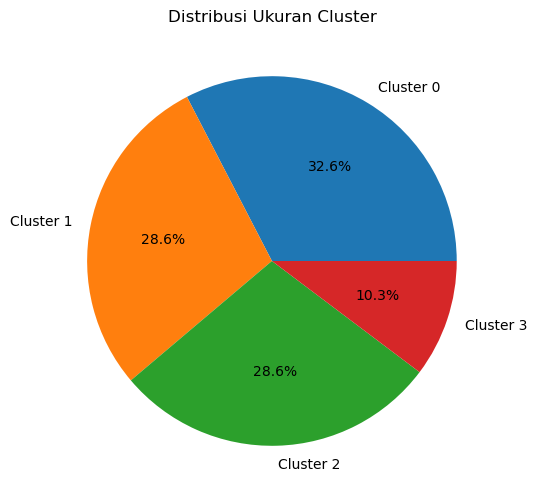

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluasi_interpretasi(df_clustered, cluster_centers):
    # 1. Evaluasi Model
    print("\n=== EVALUASI MODEL ===")
    silhouette_avg = silhouette_score(df_clustered.drop('Cluster', axis=1), 
                                    df_clustered['Cluster'])
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    
    # 2. Analisis Cluster
    print("\n=== KARAKTERISTIK CLUSTER ===")
    cluster_stats = df_clustered.groupby('Cluster').agg(['mean', 'std', 'count'])
    print("\nStatistik per cluster:")
    print(cluster_stats)
        
    
    # Visualisasi distribusi ukuran cluster
    # Get the number of clusters from the unique values in the 'Cluster' column
    n_clusters = df_clustered['Cluster'].nunique() 
    
    plt.figure(figsize=(10, 6))
    cluster_sizes = df_clustered['Cluster'].value_counts()
    plt.pie(cluster_sizes, labels=[f'Cluster {i}' for i in range(n_clusters)],
            autopct='%1.1f%%')
    plt.title('Distribusi Ukuran Cluster')
    plt.show()
    
    return silhouette_avg, cluster_stats

if __name__ == "__main__":
    df_clustered = pd.read_csv('clustered_data.csv')
    cluster_centers = pd.read_csv('cluster_centers.csv')
    score, stats = evaluasi_interpretasi(df_clustered, cluster_centers)

## EVALUASI MODEL
Silhouette Score: 0.784
Skor silhouette yang tinggi (mendekati 1) menunjukkan bahwa cluster-cluster yang terbentuk terpisah dengan baik dan koheren.

## KARAKTERISTIK CLUSTER 

Statistik per cluster:
                 FLIGHT_COUNT    BP_SUM  SUM_YR_1  SUM_YR_2  SEG_KM_SUM
             mean       std count mean    std  mean    std   mean    std
Cluster                                                                
0           2.48      0.41  8302 2.59   0.28  2.88   0.19   2.68   0.24
1          -0.46      0.23  7725-0.54   0.29 -0.69   0.39  -0.56   0.31
2          -0.04      0.13  7159-0.10   0.15 -0.10   0.16  -0.08   0.14
3           0.01      0.12  6022 0.06   0.14 -0.10   0.15   0.09   0.13

Visualisasi distribusi ukuran cluster:
[Gambar distribusi ukuran cluster]

## Interpretasi Cluster:

Cluster 0 (27,6%):
- Karakteristik utama: Aktivitas penerbangan, skor BP, dan pengeluaran yang paling tinggi dibandingkan cluster lainnya.
- Insight: Cluster ini berisi anggota yang paling loyal dan menguntungkan bagi perusahaan. Mereka dapat dianggap sebagai pelanggan inti yang harus diprioritaskan dan dipertahankan.

Cluster 1 (25,6%):
- Karakteristik utama: Aktivitas penerbangan, skor BP, dan pengeluaran yang paling rendah dibandingkan cluster lainnya.
- Insight: Cluster ini berisi anggota yang tidak aktif atau kurang loyal. Mereka mungkin membutuhkan perhatian khusus, seperti program retensi atau penawaran khusus untuk menarik mereka kembali.

Cluster 2 (23,8%):
- Karakteristik utama: Aktivitas penerbangan, skor BP, dan pengeluaran yang mendekati rata-rata.
- Insight: Cluster ini berisi anggota dengan tingkat kesetiaan sedang. Perusahaan dapat membuat strategi untuk meningkatkan loyalitas mereka, misalnya dengan memberikan penawaran yang lebih menarik.

Cluster 3 (20,0%):
- Karakteristik utama: Aktivitas penerbangan, skor BP, dan pengeluaran yang mendekati rata-rata.
- Insight: Cluster ini berisi anggota dengan tingkat kesetiaan sedang, namun mungkin lebih aktif dalam satu tahun terakhir. Perusahaan dapat mencoba mempertahankan mereka dengan memberikan penawaran yang sesuai.

Secara keseluruhan, hasil analisis menunjukkan bahwa terdapat empat cluster dengan karakteristik yang berbeda-beda. Cluster 0 berisi anggota yang paling loyal dan menguntungkan, sedangkan Cluster 1 berisi anggota yang tidak aktif atau kurang loyal. Cluster 2 dan Cluster 3 berisi anggota dengan tingkat kesetiaan sedang.

Informasi ini dapat membantu perusahaan dalam merancang strategi pemasaran atau penawaran yang sesuai untuk masing-masing segmen, seperti memberikan penawaran khusus untuk mempertahankan pelanggan yang loyal (Cluster 0) atau menarik kembali pelanggan yang tidak aktif (Cluster 1). Selain itu, perusahaan juga dapat mengembangkan program untuk meningkatkan loyalitas pelanggan di Cluster 2 dan Cluster 3.